In [1]:
#  pip install openpyxl

In [31]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter6')


In [4]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False


D:\Users\HP\miniconda3\envs\ee\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
D:\Users\HP\miniconda3\envs\ee\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


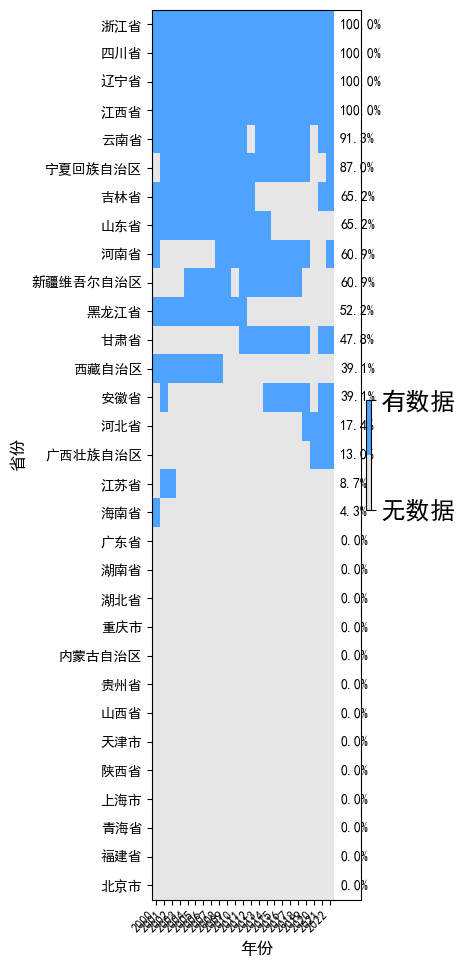

PermissionError: [Errno 13] Permission denied: '省份_年份可得性热力图.png'

In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ========= 基础参数 =========
file_path   = Path(r"各省份地级市数据情况.xlsx")  # 改成你的本地路径
province_col = "省份"                                      # 若列名不同请修改
sheet_name   = 0                                          # 或者指定工作表名

# ========= 读取与预处理 =========
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 识别年份列（2000–2022）
year_cols = []
for c in df.columns:
    # 既兼容 int，也兼容 '2000' 这样的字符串
    try:
        y = int(str(c))
        if 2000 <= y <= 2022:
            year_cols.append(c)
    except:
        pass

if province_col not in df.columns:
    raise ValueError(f"未找到省份列：{province_col}")

data = df[[province_col] + year_cols].copy()

# 将所有年份列强制转为 {0,1}，其他数值视为有数据(>0 -> 1)
for c in year_cols:
    data[c] = pd.to_numeric(data[c], errors="coerce").fillna(0)
    data[c] = (data[c] > 0).astype(int)

# 计算各省份年份覆盖率用于排序
data["有数据年份数"] = data[year_cols].sum(axis=1)
data["年份占比(%)"] = data["有数据年份数"] / len(year_cols) * 100
data_sorted = data.sort_values("年份占比(%)", ascending=False).reset_index(drop=True)

# 作图矩阵（行=省份，列=年份）
M = data_sorted[year_cols].to_numpy(dtype=float)

# ========= 画热力图 =========
fig, ax = plt.subplots(figsize=(5, 10))

# 自定义 0/1 两色：0=浅灰，1=蓝色（可替换为其他颜色）
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#E6E6E6", "#4DA3FF"])

im = ax.imshow(M, aspect="auto", cmap=cmap, vmin=0, vmax=1)

# 坐标轴标签
ax.set_yticks(np.arange(M.shape[0]))
ax.set_yticklabels(data_sorted[province_col].tolist(), fontsize=10)

years_int = [int(y) for y in year_cols]
ax.set_xticks(np.arange(M.shape[1]))
ax.set_xticklabels(years_int, rotation=45, ha="right", fontsize=9)

ax.set_xlabel("年份", fontsize=12)
ax.set_ylabel("省份", fontsize=12)
# ax.set_title("2000–2022年各省份市级死亡率数据可得性（1=有，0=无）", fontsize=14)

# 右侧加一个简洁色标
cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02, ticks=[0, 1])
cbar.ax.set_yticklabels(["无数据", "有数据"])

# 在每行右侧标注覆盖率
for i, p in enumerate(data_sorted[province_col].tolist()):
    pct = data_sorted.loc[i, "年份占比(%)"]
    ax.text(M.shape[1] + 0.3, i, f"{pct:.1f}%", va="center", fontsize=10)

# 让右侧给覆盖率标签留出空间
ax.set_xlim(-0.5, M.shape[1] + 3)

plt.tight_layout()
plt.show()

# ========= 可选：同时输出一张PNG =========
out_png = file_path.with_name("省份_年份可得性热力图.png")
fig.savefig(out_png, dpi=300, bbox_inches="tight")
print(f"图已保存：{out_png}")


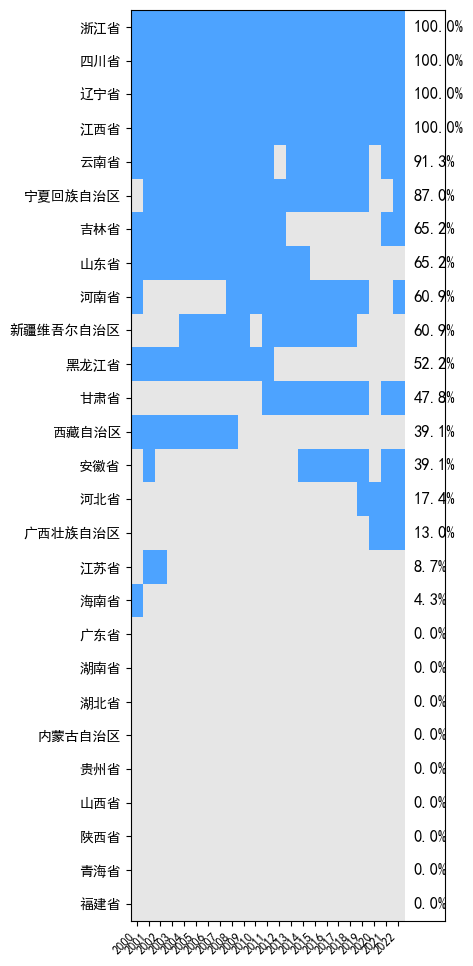

In [13]:
# 计算各省份年份覆盖率用于排序
data["有数据年份数"] = data[year_cols].sum(axis=1)
data["年份占比(%)"] = data["有数据年份数"] / len(year_cols) * 100
data_sorted = data.sort_values("年份占比(%)", ascending=False).reset_index(drop=True)

# ===== 去掉四个直辖市 =====
exclude = ["北京市", "天津市", "上海市", "重庆市"]
data_sorted = data_sorted[~data_sorted[province_col].isin(exclude)].reset_index(drop=True)

# 作图矩阵（行=省份，列=年份）
M = data_sorted[year_cols].to_numpy(dtype=float)

# ========= 画热力图 =========
fig, ax = plt.subplots(figsize=(5, 10))

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#E6E6E6", "#4DA3FF"])

im = ax.imshow(M, aspect="auto", cmap=cmap, vmin=0, vmax=1)

ax.set_yticks(np.arange(M.shape[0]))
ax.set_yticklabels(data_sorted[province_col].tolist(), fontsize=10)

years_int = [int(y) for y in year_cols]
ax.set_xticks(np.arange(M.shape[1]))
ax.set_xticklabels(years_int, rotation=45, ha="right", fontsize=9)

# ax.set_xlabel("年份", fontsize=12)
# ax.set_ylabel("省份", fontsize=12)

# cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02, ticks=[0, 1])
# cbar.ax.set_yticklabels(["无数据", "有数据"])

for i, p in enumerate(data_sorted[province_col].tolist()):
    pct = data_sorted.loc[i, "年份占比(%)"]
    ax.text(M.shape[1] + 0.3, i, f"{pct:.1f}%", va="center", fontsize=12)

ax.set_xlim(-0.5, M.shape[1] + 3)

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 27993 (\N{CJK UNIFIED IDEOGRAPH-6D59}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 30465 (\N{CJK UNIFIED IDEOGRAPH-7701}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3895806128.py:35: UserWarning: Glyph 36797 (\N{CJK UNIFIED IDEOGRAPH-8FBD}) missing from current f

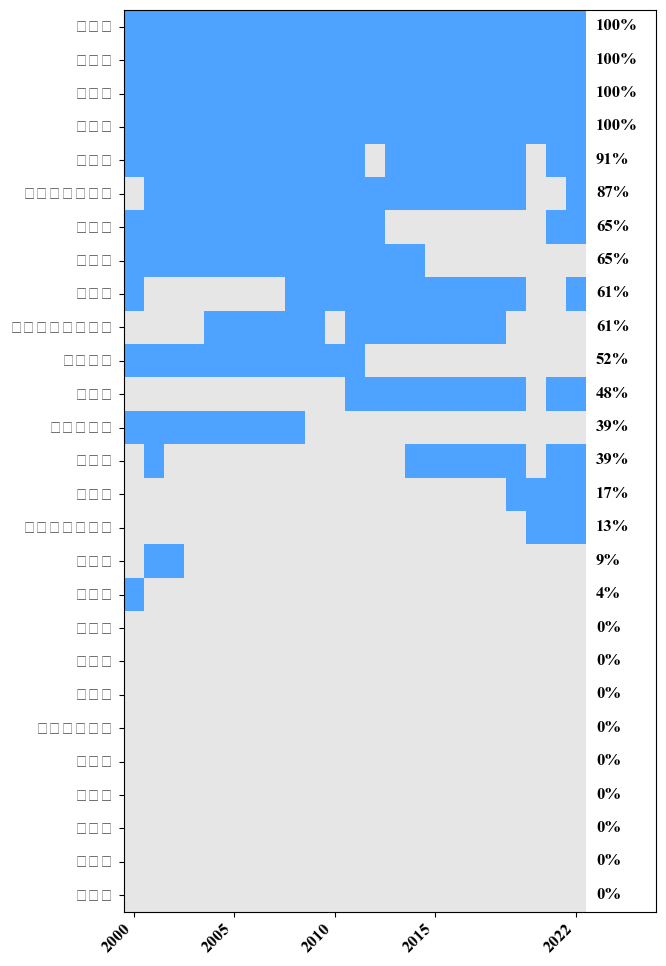

In [34]:
# ========= 画热力图 =========
fig, ax = plt.subplots(figsize=(7, 10))

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#E6E6E6", "#4DA3FF"])

im = ax.imshow(M, aspect="auto", cmap=cmap, vmin=0, vmax=1)

# y 轴
ax.set_yticks(np.arange(M.shape[0]))
ax.set_yticklabels(data_sorted[province_col].tolist(), fontsize=12)

# x 轴：只显示首位、2005、2010、2015、2020、末位
years_int = [int(y) for y in year_cols]
special_years = [years_int[0], 2005, 2010, 2015, years_int[-1]]
special_positions = [years_int.index(y) for y in special_years if y in years_int]

ax.set_xticks(special_positions)
ax.set_xticklabels(special_years, rotation=45, ha="right", fontsize=12)

# ax.set_xlabel("年份", fontsize=12)
# ax.set_ylabel("省份", fontsize=12)

# 色标
# cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02, ticks=[0, 1])
# cbar.ax.set_yticklabels(["无数据", "有数据"])

# 覆盖率标注
for i, p in enumerate(data_sorted[province_col].tolist()):
    pct = data_sorted.loc[i, "年份占比(%)"]
    ax.text(M.shape[1] + 0.01, i, f"{pct:.0f}%", va="center", fontsize=12)

ax.set_xlim(-0.5, M.shape[1] + 3)

plt.tight_layout()
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-06-05-数据缺失情况2.png', dpi=400, bbox_inches='tight',facecolor="none", transparent=True)
plt.show()
